In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class neural_net:
    
    def __init__(self,x,y,struct,activ,epoch,lr=0.01):
        self.layers=len(struct)
        self.struct=struct
        self.activ=activ
        self.x=x
        self.y=y
        self.param=self.evaluate(epoch,lr)

    def gen_network(self):
        param={}
        for i in range(self.layers):
            if i==0:a,b=self.struct[i],self.x.shape[0]
            else:a,b=self.struct[i],self.struct[i-1]
            param[f'w{i+1}']=np.random.randn(a,b)
            param[f'b{i+1}']=np.random.randn(a,1)
        return param

    def activate(self,z,func,d=False,alpha=0.01):
        if func=='s':
            if not d: return 1/(1+np.exp(-z))
            else:     return z*(1-z)
        elif func=='t':
            if not d: return (np.exp(z)-np.exp(-z))/(np.exp(z)+np.exp(-z))
            else:     return 1-z**2
        elif func=='r':
            if not d: return np.maximum(0,z)
            else:     return np.int64(z>0)
        elif func=='lr':
            if not d: return np.maximum(0.01*z,z)
            else:     return np.where(z>0,1,alpha)
            
    def forward(self,param):
        fwd={}
        for i in range(self.layers):
            if i==0:
                fwd[f'z{i+1}']=np.dot(param['w1'],self.x)+param[f'b{i+1}']
                fwd[f'a{i+1}']=self.activate(z=(fwd[f'z{i+1}']),func=self.activ[i]) 
            else:
                fwd[f'z{i+1}']=np.dot(param[f'w{i+1}'],fwd[f'a{i}'])+param[f'b{i+1}']
                fwd[f'a{i+1}']=self.activate(z=fwd[f'z{i+1}'],func=self.activ[i]) 
        return fwd

    def back(self,fwd,param):
        delta={}
        for i in range(self.layers,0,-1):
            if i==self.layers:
                delta[f'dz{i}']=fwd[f'a{i}']-self.y
                delta[f'dw{i}']=np.dot(delta[f'dz{i}'],fwd[f'a{i-1}'].T)/self.y.shape[1]
                delta[f'db{i}']=np.sum(delta[f'dz{i}'],axis=1,keepdims=True)/self.y.shape[1]
            elif i==1:
                delta[f'dz{i}']=(np.dot(param[f'w{i+1}'].T,delta[f'dz{i+1}']))*(self.activate(fwd[f'z{i}'],self.activ[i-1],d=True))
                delta[f'dw{i}']=np.dot(delta[f'dz{i}'],self.x.T)/self.y.shape[1]
                delta[f'db{i}']=np.sum(delta[f'dz{i}'],axis=1,keepdims=True)/self.y.shape[1]
            else:
                delta[f'dz{i}']=(np.dot(param[f'w{i+1}'].T,delta[f'dz{i+1}']))*(self.activate(fwd[f'z{i}'],self.activ[i-1],d=True))
                delta[f'dw{i}']=np.dot(delta[f'dz{i}'],fwd[f'a{i-1}'].T)/self.y.shape[1]
                delta[f'db{i}']=np.sum(delta[f'dz{i}'],axis=1,keepdims=True)/self.y.shape[1]
        return delta

    def update(self,param,delta,lr):
        for i in param:
            param[i]-=lr*delta[f'd{i}']
        return param
    
    def cost(self,yh,n):
        m = self.y.shape[1]
        try:
            logp = np.multiply(self.y,np.log(yh))+np.multiply((1-self.y),np.log(1-yh))
            cost = np.sum(-logp)/m
        except Exception as e:
            print(n,e)
        cost=float(np.squeeze(cost))
        return cost
    
    def evaluate(self,epoch,lr,cost_out=True):  
        param=self.gen_network()
        cost=[]
        for i in range(epoch):
            fwd=self.forward(param=param)
            cost.append(self.cost(fwd[f'a{len(self.struct)}'],i))
            delta=self.back(fwd,param)
            param=self.update(param,delta,lr)
        if cost_out:
            plt.plot(cost)
        return param

In [3]:
np.random.seed(1)
x=np.random.randn(5,6)
y=np.int64(np.random.randn(1,6)>0)

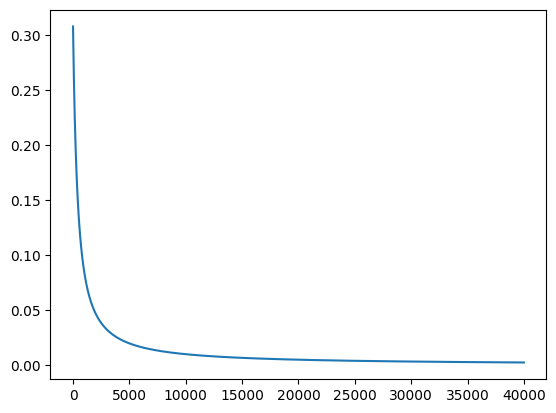

In [5]:
nn=neural_net(x,y,[6,5,4,3,2,1],['r','r','r','r','r','s'],40000,0.01)

In [6]:
nn.param

{'w1': array([[-0.41675785, -0.05626683, -2.1361961 ,  1.64027081, -1.79343559],
        [-0.84174737,  0.50288142, -1.24528809, -1.05795222, -0.90900761],
        [ 0.55145404,  2.29220801,  0.04153939, -1.11792545,  0.53905832],
        [-0.5961597 , -0.0191305 ,  1.17500122, -0.74787095,  0.00902525],
        [-0.87810789, -0.15643417,  0.25657045, -0.98877905, -0.33882197],
        [-0.23618403, -0.63765501, -1.18761229, -1.42121723, -0.1534952 ]]),
 'b1': array([[-0.26905696],
        [ 2.23136679],
        [-2.43476758],
        [ 0.1127265 ],
        [ 0.37044454],
        [ 1.35963386]]),
 'w2': array([[ 5.01857207e-01, -8.44213704e-01,  9.76147160e-06,
          5.42352572e-01, -3.13508197e-01,  7.71011738e-01],
        [-1.86809065e+00,  1.73118467e+00,  1.46767801e+00,
         -3.35677339e-01,  6.11340780e-01,  4.79705919e-02],
        [-8.29135289e-01,  8.77102184e-02,  1.00036589e+00,
         -3.81092518e-01, -3.75669423e-01, -7.44707629e-02],
        [ 4.33496330e-01,  